<a href="https://colab.research.google.com/github/jdhernandezf/Graficas-oscilaciones/blob/main/TP1/Oscilador_amortiguado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

<function matplotlib.pyplot.show(*args, **kw)>

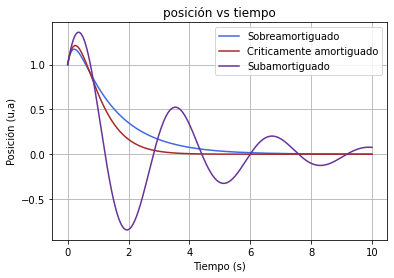

In [ ]:
#Condiciones iniciales
#----------------------------------------------------------------------
omega=2         #Frecuencia de oscilación.
gamma=3           #Frecuencia de amortiguamiento, mayor que omega.
x_0=1          #Posición inicial
v_0=2            #Velocidad inicial
m=1
#----------------------------------------------------------------------

#Calcular c1 y c2

c1=(x_0*(gamma+np.sqrt(gamma**2-omega**2))+(v_0))/(2*np.sqrt(gamma**2-omega**2))
c2=(v_0+x_0*((gamma-np.sqrt(gamma**2-omega**2))))/(-2*np.sqrt(gamma**2-omega**2))

def expuno(t):
    return np.exp((-gamma+np.sqrt(gamma**2-omega**2))*t)

def expdos(t):
    return np.exp((-gamma-np.sqrt(gamma**2-omega**2))*t)

##################Pasos para graficar la variable independiente#############
T=10                   #Hasta donde graficar en el tiempo
n=1000                      #Numero de puntos a graficar
t=np.linspace(0,T,n+1)


##################construi la grafica####################
plt.plot(t,(c2*expdos(t)+c1*expuno(t)),label='Sobreamortiguado',color='royalblue')
plt.title("posición vs tiempo")
plt.ylabel("Posición (u,a)")
plt.xlabel("Tiempo (s)")
plt.legend(loc=1)
plt.grid()



#-------------------------CRITICAMENTE AMORTIGUADO
#Condiciones iniciales
#----------------------------------------------------------------------
gamma=omega           #Frecuencia de amortiguamiento, igual que omega.
#----------------------------------------------------------------------

#Calcular c1 y c2

c1=x_0
c2=v_0+(gamma*x_0)

def exp1(t):
    return np.exp(-gamma*t)


##################construi la grafica####################
#plt.figure()                    #Si quiere separar la grafica quite el '#'
plt.plot(t,(c2*t+c1)*exp1(t),label='Criticamente amortiguado',color='brown')
plt.title("posición vs tiempo")
plt.ylabel("Posición (u,a)")
plt.xlabel("Tiempo (s)")
plt.legend(loc=1)
plt.grid()



#-------------------------SUBAMORTIGUADO-----------------------------
#Condiciones iniciales
#----------------------------------------------------------------------
gamma=0.3           #Frecuencia de amortiguamiento, menor que omega.
#----------------------------------------------------------------------

#Calcular c1 y c2

c2=x_0
B=(np.sqrt(omega**2-gamma**2))
c1=(v_0+gamma*x_0)/B

A=np.sqrt(c1**2+c2**2)
fi=np.arctan(c2/c1)

def exp1(t):
    return np.exp((-gamma)*t)

def cos(t):
    return np.cos(B*t+fi)

def sin(t):
    return np.sin(B*t+fi)

##################construi la grafica####################
#plt.figure()                    #Si quiere separar la grafica quite el '#'
plt.plot(t,A*exp1(t)*sin(t),label='Subamortiguado',color='rebeccapurple')
#plt.plot(t,A*exp1(t),'m--',label='Amplitud(t)')
#plt.plot(t,-A*exp1(t),"m--")
plt.title("posición vs tiempo")
plt.ylabel("Posición (u,a)")
plt.xlabel("Tiempo (s)")
plt.legend(loc=1)
plt.grid()
plt.show



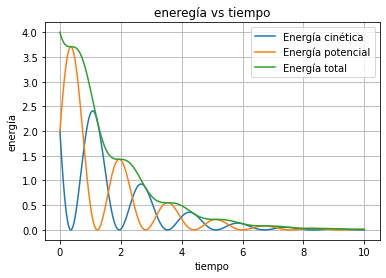

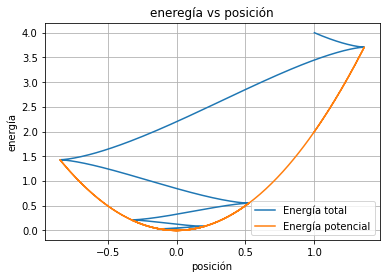

In [ ]:
def Ep3(t):
    return (1/2)*m*(omega**2)*(A*exp1(t)*sin(t))**2

def Ec3(t):
    return (1/2)*m*(A*exp1(t)*B*cos(t)-A*exp1(t)*gamma*sin(t))**2

#def Ep3(t):
#    return (1/2)*m*(omega**2)*(A*exp1(t))**2

#def Ec3(t):
#    return -(1/2)*m*(A*exp1(t))**2*gamma*omega*sin(2*t)


def Grafica(gamma,omega):
  #################gráfica de energías#####################
  #plt.figure(figsize=(12,10))
  plt.plot(t,Ec3(t),label='Energía cinética')
  plt.plot(t,Ep3(t),label='Energía potencial')
  plt.plot(t,Ep3(t)+Ec3(t),label='Energía total')
  plt.title("eneregía vs tiempo")
  plt.ylabel("energía")
  plt.xlabel("tiempo")
  plt.legend(loc=1)
  plt.grid()

  plt.figure()
  plt.plot(A*exp1(t)*sin(t),Ep3(t)+Ec3(t),label='Energía total')
  plt.title("eneregía vs posición")
  plt.ylabel("energía")
  plt.xlabel("posición")
  plt.legend(loc=1)

  plt.plot(A*exp1(t)*sin(t),(1/2)*omega**2*(A*exp1(t)*sin(t))**2,label='Energía potencial')
  plt.title("eneregía vs posición")
  plt.ylabel("energía")
  plt.xlabel("posición")
  plt.legend(loc=4)
  plt.grid()

omega=2
gamma=0.3

c2=x_0
B=(np.sqrt(omega**2-gamma**2))
c1=(v_0+gamma*x_0)/B

A=np.sqrt(c1**2+c2**2)
fi=np.arctan(c2/c1)

Grafica(gamma,omega)

In [ ]:
interactive_plot = interactive(Grafica,gamma=(0.1,8,0.1),omega=(10,100,1))
interactive_plot

interactive(children=(FloatSlider(value=4.0, description='gamma', max=8.0, min=0.1), IntSlider(value=55, descr…